## INFORMATION VISUALIZATIONS OF NORTH AMERICAN BIRD SONG RECORINDGS

### 1. LIBRARIES

#### 1.1 Installing and Importing Libraries

In [1]:
# 1.1 (a) - Installing Libraries (if needed)

!pip install opendatasets
!pip install folium

In [2]:
# 1.1 (b) - Importing Libraries and Functions

import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import opendatasets as od
import os 
import matplotlib
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

### 2. API & DATASET

#### 2.1 - Assembling the API

In [3]:
# 2.1 (a) - Implementing API, Using Personalized Kaggle API Key

dfurl = "https://www.kaggle.com/datasets/gpreda/bird-songs-recordings-from-united-states"
od.download(dfurl, force=True)

    # PLEASE USE: {"username":"andrewmedds","key":"afb9070b7bc4db5e2ddeb16d1e51e56a"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  andrewmedds


Your Kaggle Key:

  ········


100%|██████████| 7.31M/7.31M [00:00<00:00, 31.7MB/s]


In [4]:
# 2.1 (b) - Identifying File Name & Location (Directory)

df_dir = "./bird-songs-recordings-from-united-states"
df_name = str(os.listdir(df_dir))
df_name = df_name[2:-2]

#### 2.2 - Importing the Dataset

In [5]:
# 2.2 (a) - Reading the Dataset as "Birds"

birds = pd.read_csv(df_dir + "/" + df_name, low_memory=False)

### 3. EXPLORATORY DATA ANALYSIS

#### 3.1 - Shape of the Dataset, Variables, & Summary Statistics

In [6]:
# 3.1 (a) - Shape of the dataframe (row, col)

birds.shape

(53279, 26)

In [7]:
# 3.1 (b) - First rows of the dataframe 

birds.head()

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,lic,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used
0,527379,Dendrocygna,autumnalis,NaN,Black-bellied Whistling Duck,Thomas Magarian,United States,"Circle B Bar Reserve, Lakeland, Polk County, F...",27.9901,-81.8658,...,//creativecommons.org/licenses/by-nc-sa/4.0/,no score,0:35,12:35,2019-01-14,2020-02-12,[''],Recording amplified. High pass filter used. Fl...,yes,no
1,480387,Dendrocygna,autumnalis,NaN,Black-bellied Whistling Duck,Russ Wigh,United States,"Savannah, Chatham County, Georgia",31.9643,-81.0152,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:35,07:30,2019-06-08,2019-06-10,[''],A wetland area in a maritime forest next to a...,yes,no
2,316537,Dendrocygna,autumnalis,NaN,Black-bellied Whistling Duck,Jim Holmes,United States,"Chalkley Road, Cameron Parish, Louisiana",30.0237,-93.0578,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:07,18:00,2016-05-14,2016-05-15,[''],NaN,yes,no
3,192058,Dendrocygna,autumnalis,NaN,Black-bellied Whistling Duck,Paul Marvin,United States,"Orlando Wetlands, Christmas, Orange County, Fl...",28.5785,-80.9961,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,0:19,06:47,2014-06-08,2014-08-21,[''],single bird in flight over marsh,yes,no
4,172910,Dendrocygna,autumnalis,NaN,Black-bellied Whistling Duck,Paul Marvin,United States,"Orlando Wetlands, Christmas, Orange County, Fl...",28.5785,-80.9961,...,//creativecommons.org/licenses/by-nc-sa/4.0/,A,1:18,11:00,2014-03-23,2014-04-08,"['Melanerpes carolinus', 'Spatula discors', 'C...",calling from ten birds in marsh,yes,no


In [8]:
# 3.1 (c) - Data type of each variable

birds.dtypes

id                 int64
gen               object
sp                object
ssp               object
en                object
rec               object
cnt               object
loc               object
lat              float64
lng              float64
alt               object
type              object
url               object
file              object
file-name         object
sono              object
lic               object
q                 object
length            object
time              object
date              object
uploaded          object
also              object
rmk               object
bird-seen         object
playback-used     object
dtype: object

In [9]:
# 3.1 (d) - Descriptive Statistics for Numerical Vars

birds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,53279.0,281822.410894,158130.006484,1133.0000,142333.5000,282580.0000,406394.5000,580311.0000
lat,52261.0,37.796784,8.207155,-14.3416,32.2789,36.2853,41.6070,71.3632
lng,52261.0,-103.344254,21.757498,-177.3911,-116.7684,-107.6878,-84.0948,176.8320


#### 3.2 Initial Cleaning 

In [10]:
# 3.2 (a) - Variable elimination

birds_og = birds
        
birds.drop(['cnt', 'rec', 'file', 'file-name', 'lic', 'uploaded'], axis=1)

birds['cnt'].describe()

count             53279
unique                1
top       United States
freq              53279
Name: cnt, dtype: object

In [11]:
# 3.2 (b) - Variable type conversions

birds["bird-seen"] = birds["bird-seen"].map(dict(yes=1, no=0))

birds["playback-used"] = birds["playback-used"].map(dict(yes=1, no=0))

birds.dtypes

id                 int64
gen               object
sp                object
ssp               object
en                object
rec               object
cnt               object
loc               object
lat              float64
lng              float64
alt               object
type              object
url               object
file              object
file-name         object
sono              object
lic               object
q                 object
length            object
time              object
date              object
uploaded          object
also              object
rmk               object
bird-seen        float64
playback-used    float64
dtype: object

In [12]:
# 3.2 (c) - Removing N/A Values

birds_noNA = birds.dropna() 
birds_noNA.shape

(4766, 26)

### 4. VARIABLE EXPLORATION & PLOTS

#### 4.1 - Taxonomic Plots


Setophaga           2926
Vireo               1703
Empidonax           1243
Mystery              980
Melospiza            933
                    ... 
Fratercula             1
Ptychoramphus          1
Synthliboramphus       1
Numida                 1
Tetraogallus           1
Name: gen, Length: 376, dtype: int64

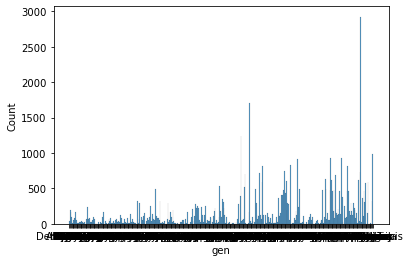

In [13]:
# 4.1 (a) - Bird Genus 

sns.histplot(data=birds, x="gen")

birds['gen'].describe()
birds['gen'].value_counts()

<AxesSubplot:ylabel='Frequency'>

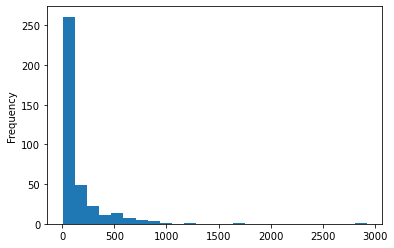

In [14]:
# 4.1 (b) - Bird Genus - Density of Occurances plot using value count

birds.gen.value_counts().sort_values().plot(kind = 'hist', bins=25)

mystery         980
carolinensis    934
americana       811
ludovicianus    747
melodia         650
               ... 
corniculata       1
glacialis         1
melanotus         1
japonensis        1
albicaudatus      1
Name: sp, Length: 679, dtype: int64

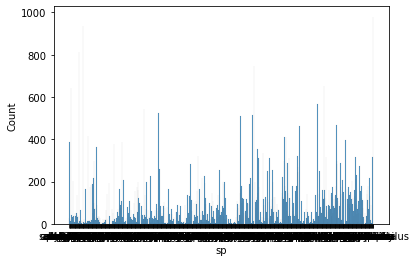

In [15]:
# 4.1 (c) - Bird Species 

sns.histplot(data=birds, x="sp")

birds['sp'].describe()
birds['sp'].value_counts()

<AxesSubplot:ylabel='Frequency'>

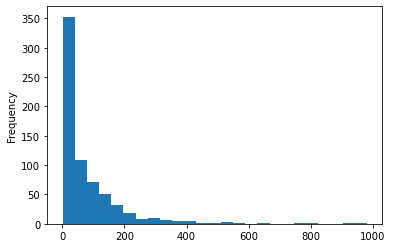

In [16]:
# 4.1 (d) - Bird Species - Density of Occurances plot using value count

birds.sp.value_counts().sort_values().plot(kind = 'hist', bins=25)

arizonae                    206
magister                    183
celsum                      170
occidentalis                154
nelsoni                     143
                           ... 
oedicus                       1
macgillivraii                 1
ustulatus                     1
susurrans (?)                 1
melospiza melodia sanaka      1
Name: ssp, Length: 742, dtype: int64

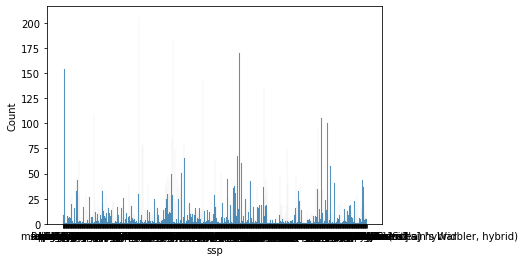

In [17]:
# 4.1 (e) - Bird Singular Species

sns.histplot(data=birds, x="ssp")

birds['ssp'].describe()
birds['ssp'].value_counts()

<AxesSubplot:ylabel='Frequency'>

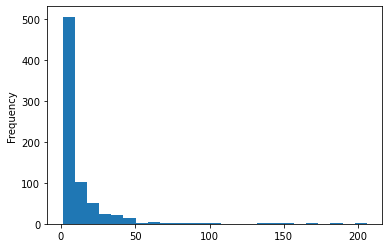

In [18]:
# 4.1 (f) - Bird Singular Species - Density of Occurances plot using value count

birds.ssp.value_counts().sort_values().plot(kind = 'hist', bins=25)

#### 4.2 - Observation Description Plots

Histogram of 'Bird-Seen'
Mean = 0.761. In 76.1% of observations, the bird was seen.


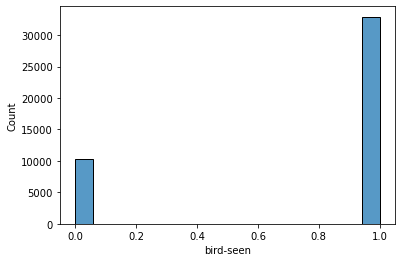

In [19]:
# 4.2 (a) - Bird Seen vs. Unseen

sns.histplot(data=birds_og, x="bird-seen")

mean = ("%.3f" % birds['bird-seen'].mean())

print("Histogram of 'Bird-Seen'")
print("Mean = " + str(mean) + ". In 76.1% of observations, the bird was seen.")

Histogram of 'Playback-Used'
Mean = 0.047. In 4.7% of observations, a playback was used.


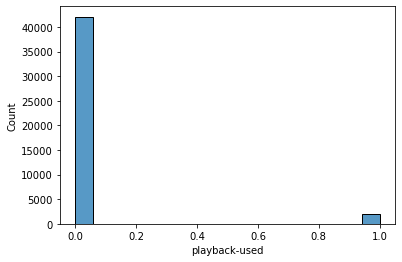

In [20]:
# 4.2 (b) - Playback Used vs. Unsused

plot = sns.histplot(data=birds_og, x="playback-used")

mean = ("%.3f" % birds['playback-used'].mean())

print("Histogram of 'Playback-Used'")
print("Mean = " + str(mean) + ". In 4.7% of observations, a playback was used.")

[Text(0.5, 1.0, '4.2 c - Quality of Recording Histogram')]

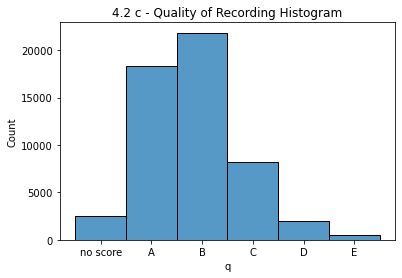

In [21]:
# 4.2 (c) - Recording Quality (grade)

sns.histplot(data = birds, x="q").set(title= "4.2 c - Quality of Recording Histogram")

#### 4.3 - Recording Description Plots

<AxesSubplot:xlabel='length', ylabel='Count'>

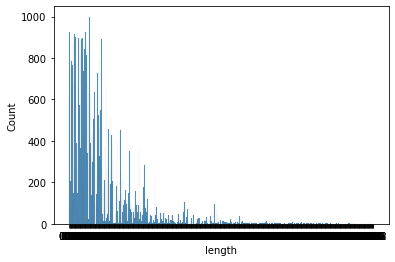

In [22]:
# 4.3 (a) - Recording Length

sns.histplot(data=birds, x="length")

In [23]:
# 4.3 (b)  - Clean length

birds['minute'] = birds['length'].apply(lambda x: x.split(':')[0])
birds['seconds'] = birds['length'].apply(lambda x: x.split(':')[1])
birds['minute'] = birds['minute'].astype(int)
birds['seconds'] = birds['seconds'].astype(int)

birds['rec_sec'] = np.where(birds['minute']!=0, birds['minute'] * 60,0) 
birds['rec_sec'] = birds['rec_sec'] + birds['seconds']

# discritize 
birds['lengthdis'] = np.digitize(birds['rec_sec'],[30,60])

Histogram of Recording Length (4.3 c)


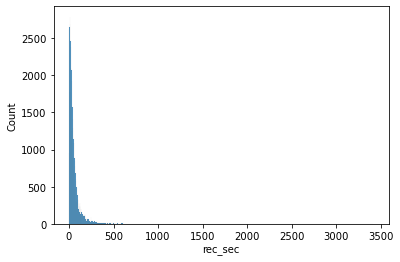

In [24]:
# 4.3 (c) - Recording Length, Clean 
sns.histplot(data=birds, x="rec_sec")
print("Histogram of Recording Length (4.3 c)")

Histogram of Recording Length, Discritized (4.3 d)


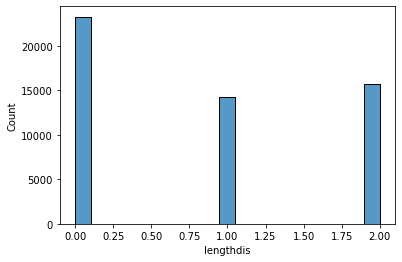

In [25]:
# 4.3 (d) - Recording Length Discritized, clean
sns.histplot(data=birds, x="lengthdis")
print("Histogram of Recording Length, Discritized (4.3 d)")

#### 4.4 - Relationships in the Data

[Text(0.5, 1.0, '4.4 (a) - Boxplot of Recording Seconds by Recording Quality')]

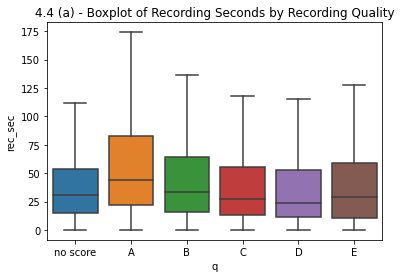

In [35]:
# 4.4 (a) - Facet by Recording Quality
sns.boxplot(data=birds, x='q', y='rec_sec',showfliers = False).set(title="4.4 (a) - Boxplot of Recording Seconds by Recording Quality")

[Text(0.5, 1.0, '4.4 (b) - Boxplot of Recording Seconds by Recording Quality and Bird-Seen')]

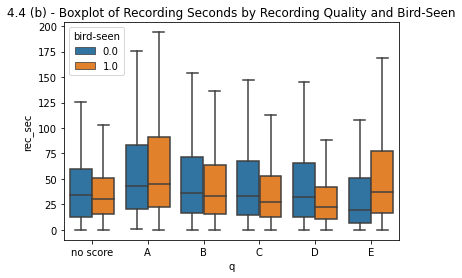

In [37]:
# 4.4 (b) - Breaking out by Bird-Seen
sns.boxplot(data=birds,x='q',y='rec_sec',hue='bird-seen',showfliers=False).set(title="4.4 (b) - Boxplot of Recording Seconds by Recording Quality and Bird-Seen")

4.4 (c): Density Histograms of Recording Quality Split by Bird-Seen


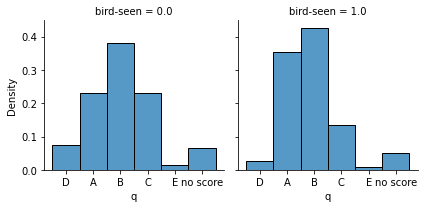

In [47]:
# 4.4 (c) - Breaking out by Bird-Seen
g=sns.FacetGrid(data=birds, col='bird-seen')
g.map_dataframe(sns.histplot, x='q', stat='density') # HOW TO CHANGE ORDER 
print('4.4 (c): Density Histograms of Recording Quality Split by Bird-Seen')

#### 4.5 - Spatial Plots

count     52780
unique      626
top           0
freq       5003
Name: alt, dtype: object

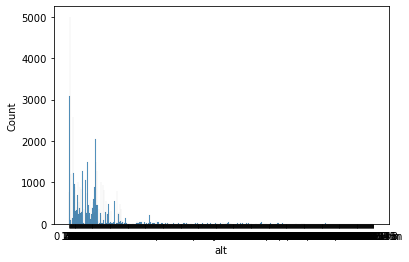

In [29]:
# 4.5 (a) - Elevation ("alt")
    
sns.histplot(data=birds,x="alt")

birds['alt'].describe()

In [30]:
# 4.5 (b) - HeatMap of Observations

birds_latlng_noNA = birds.dropna(subset=['lat','lng']) #removing NAs

map = folium.Map(location=[39.8283, -98.5795], tiles='cartodbpositron', zoom_start=3) #setting up the map & position

HeatMap(data=birds_latlng_noNA[['lat', 'lng']], radius=12).add_to(map) #overlaying data as heatmap

print(birds_latlng_noNA['lat'].count()) #printing the count after removing NAs

map

52261


In [31]:
# 4.5 (c) - Alaska

alaska_birds = birds_latlng_noNA[(birds_latlng_noNA.lat > 51.504754) & (birds_latlng_noNA.lat < 71.399018) 
                                 & (birds_latlng_noNA.lng > -177.790904) & (birds_latlng_noNA.lng < -141.551669)]

map = folium.Map(location=[64.2008, -149.4937], tiles='cartodbpositron', zoom_start=4) #setting up the map & position

HeatMap(data=alaska_birds[['lat', 'lng']], radius=12).add_to(map) #overlaying data as heatmap

print(alaska_birds['lat'].count()) #printing the count after removing NAs

map

2196


In [32]:
# 4.5 (d) - Pacific

pacific_birds = birds_latlng_noNA[(birds_latlng_noNA.lat > -19.088959) & (birds_latlng_noNA.lat < 31.554336) 
                                  & (birds_latlng_noNA.lng <  -137.432198)]

map = folium.Map(location=[-3.454042, -166.611884], tiles='cartodbpositron', zoom_start=3) #setting up the map & position

HeatMap(data=pacific_birds[['lat', 'lng']], radius=12).add_to(map) #overlaying data as heatmap

print(pacific_birds['lat'].count()) #printing the count after removing NAs and subsetting

map

869


In [33]:
# 4.5 (e) - Contiguous 

contiguous_birds = birds_latlng_noNA[(birds_latlng_noNA.lat > 21.853437) & (birds_latlng_noNA.lat < 48.730215) 
                          & (birds_latlng_noNA.lng > -124.248603) & (birds_latlng_noNA.lng < -63.428294)]

map = folium.Map(location=[39.8283, -98.5795], tiles='cartodbpositron', zoom_start=4) #setting up the map & position

HeatMap(data=contiguous_birds[['lat', 'lng']], radius=12).add_to(map) #overlaying data as heatmap

print(contiguous_birds['lat'].count()) #printing the count after removing NAs and subsetting

map

48670
